#Assignment 3

## Part 1

In [3]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('17078.csv') # reading the given data

In [5]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,-3.845862,1.724127,-3.791628,3.008085,1.054024,-0.936138,-1.515552,-3.652877,1.310190,2.618189,0.060545,-2.038905,3.601641,-3.193317,0.458119,2.517957,-0.915489,2.551473,-1.074935,-2.273402,-1.801379,0.634736,0.273121,0.880844,2.281475,4
1,-5.139204,-6.731594,1.064878,-4.781021,1.231421,5.254207,-3.014583,0.315176,-0.961264,-5.605978,0.461314,-0.316233,0.272941,-0.615241,0.913439,3.144737,1.238625,-0.458865,1.566167,1.488333,-0.598847,0.899062,0.991829,-0.127680,0.923573,8
2,-7.971281,-1.030925,2.904664,2.079083,6.545191,-2.841261,0.977458,-0.465387,0.858469,-0.307612,-1.573792,-1.485814,1.018247,-0.501374,-0.232458,-0.158138,0.346232,-0.496994,-0.296553,0.052774,-1.492408,-1.057803,1.634809,0.834057,1.549826,1
3,-2.139565,1.922493,1.775053,-4.092461,-2.011769,-1.439583,0.727577,-6.255091,0.078073,-2.484583,-0.090063,0.239635,-1.114730,0.802407,-0.004453,-0.059214,2.299781,-0.488058,-0.971921,1.679328,0.393449,-0.893876,-0.045080,1.193916,-1.060173,8
4,-7.848439,-0.856079,2.841110,1.090115,6.680415,-2.146358,0.533774,-1.348520,0.630190,-0.761484,-2.179510,-0.461610,1.312010,-1.520090,-0.805821,-0.159107,0.434867,-0.042643,-0.146873,0.115348,-1.443315,-1.434735,1.597501,-0.237103,0.345959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-5.629641,-1.612974,2.323910,3.085447,0.887611,-4.696745,2.426052,0.663403,-0.535765,0.174409,-0.724692,-1.011181,-2.344537,2.558671,0.267206,-0.320206,0.581308,-1.709916,2.240622,0.315490,2.143546,1.263462,-1.195921,0.398235,-0.469613,6
2996,-7.152639,-2.415076,4.171785,-0.148619,6.206683,0.309827,1.791623,-3.142118,-0.587166,-2.403488,-1.848415,3.301974,1.350784,-3.379147,-0.856454,0.373334,0.501027,0.803184,0.744025,-0.745385,-1.372337,-1.915700,-0.541754,-1.488325,-0.865708,1
2997,4.501343,-5.172212,-5.939482,-4.388959,1.205370,3.770760,-4.985376,0.774807,-0.956976,-1.063710,-0.468661,5.713444,2.387344,8.423300,-2.565182,-0.705848,0.378541,-1.193655,6.280375,-1.808304,-3.060372,-0.269757,-0.824339,-0.290565,-0.111091,8
2998,0.214206,-4.088398,2.641582,-1.814317,-1.062707,3.481858,-3.810297,0.227361,3.015701,-6.589825,-0.288628,1.833179,0.222526,0.872498,-1.668973,0.053112,-1.695101,2.456549,-0.770792,4.173682,-3.421955,4.232161,-0.829565,-0.206173,-0.672560,2


In [6]:
data_with_label_4 = data[data.label == 4]
data_with_label_4.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,-3.845862,1.724127,-3.791628,3.008085,1.054024,-0.936138,-1.515552,-3.652877,1.310190,2.618189,0.060545,-2.038905,3.601641,-3.193317,0.458119,2.517957,-0.915489,2.551473,-1.074935,-2.273402,-1.801379,0.634736,0.273121,0.880844,2.281475,4
9,1.810064,-4.010127,-9.280709,1.616508,-0.718570,1.379710,-0.369463,-2.808456,-2.421248,6.329335,0.576713,-4.606620,2.764955,0.692804,5.128217,2.955705,1.416417,0.589154,-3.461215,0.449298,2.529631,-0.572914,0.352986,-2.129837,3.459593,4
18,-2.440698,4.432450,-4.039372,0.181033,-1.799510,0.351141,-2.752042,-4.467072,1.364618,-0.218737,3.296564,-0.775783,3.786751,-2.416216,1.485131,1.885217,0.801206,0.671353,-1.931425,-2.500768,-3.368918,-1.859357,-1.339904,2.115018,3.717414,4
32,-4.767479,-3.626825,-3.104800,2.593647,1.174736,2.786723,1.064341,-2.098684,-2.382774,4.073221,-2.480856,-0.440981,0.119610,-1.244849,-1.128586,2.240984,-0.349697,0.373711,-0.673867,-0.234232,2.864988,-0.095043,-0.042400,0.268200,2.272419,4
35,-4.756920,2.357465,-4.992318,2.564342,-1.145679,1.889921,-1.217639,-2.544171,4.106596,3.812559,0.724900,-2.418630,-1.360856,-1.103531,0.597088,2.540241,0.044413,-0.272925,-0.625985,-2.077565,0.170681,0.468347,0.233885,1.234675,-0.091883,4


### Selecting  two classes (4 and 5)

In [7]:
data_with_label_5 = data[data.label == 5]
data_with_label_5.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
21,-3.396799,-4.769202,-2.439840,2.380496,3.552324,-2.017597,1.145270,1.690599,-4.445123,3.788147,1.925546,1.498821,-2.427623,-1.070340,2.529535,-4.312570,-0.368825,1.510768,-1.341407,-2.947664,2.235720,0.255949,-1.278351,0.889764,-1.501754,5
40,2.927490,5.485425,2.794307,-5.830147,-1.908526,-5.076520,-0.921462,-2.860401,0.280668,3.413274,-4.794441,0.486394,1.309006,-0.402841,-1.579195,0.994535,1.665845,0.705849,-0.610193,-2.783633,0.355263,-5.387503,1.365299,0.633867,-1.872384,5
56,-4.143994,-2.673354,-0.314324,-2.301756,-1.550293,-5.241389,1.476537,0.442009,-1.768563,1.033315,-0.460654,-2.098869,-1.317036,0.216959,-0.341517,1.490273,-1.178901,-2.361312,3.642294,0.998981,1.502691,1.270196,0.950320,-1.184064,-0.083454,5
101,-4.372414,-1.280444,0.675753,-1.466079,-2.761240,-5.815876,-0.702929,0.674825,1.309396,0.764702,-0.080224,-1.757239,-2.363810,2.889007,2.475755,0.639673,-1.017852,-0.429732,2.530424,0.716896,1.573062,3.798569,-0.569060,-1.113149,1.089083,5
108,-0.659633,-7.065051,-5.149917,-8.891039,-3.594333,-2.305496,-1.159155,-4.418445,-10.077128,6.292295,2.044687,2.211909,-4.060456,-1.021853,4.913741,2.136655,-4.862056,-0.771747,-4.351303,4.431308,-1.087418,0.394126,0.543810,-2.802336,-0.141497,5


### Ploting scatter polt based on the f4 and f2 fro the selected class

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

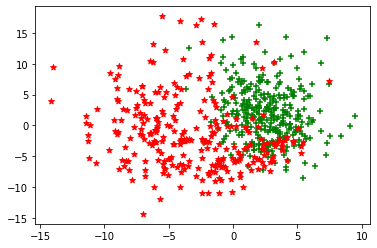

In [9]:
plt.scatter(data_with_label_4['f4'],data_with_label_4['f2'],color='green',marker='+')
plt.scatter(data_with_label_5['f4'],data_with_label_5['f2'],color='red',marker='*')

In [10]:
data_with_label_5_or_4  = data_with_label_5.append(data_with_label_4, ignore_index=True)

In [11]:
data_with_label_5_or_4

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,-3.396799,-4.769202,-2.439840,2.380496,3.552324,-2.017597,1.145270,1.690599,-4.445123,3.788147,1.925546,1.498821,-2.427623,-1.070340,2.529535,-4.312570,-0.368825,1.510768,-1.341407,-2.947664,2.235720,0.255949,-1.278351,0.889764,-1.501754,5
1,2.927490,5.485425,2.794307,-5.830147,-1.908526,-5.076520,-0.921462,-2.860401,0.280668,3.413274,-4.794441,0.486394,1.309006,-0.402841,-1.579195,0.994535,1.665845,0.705849,-0.610193,-2.783633,0.355263,-5.387503,1.365299,0.633867,-1.872384,5
2,-4.143994,-2.673354,-0.314324,-2.301756,-1.550293,-5.241389,1.476537,0.442009,-1.768563,1.033315,-0.460654,-2.098869,-1.317036,0.216959,-0.341517,1.490273,-1.178901,-2.361312,3.642294,0.998981,1.502691,1.270196,0.950320,-1.184064,-0.083454,5
3,-4.372414,-1.280444,0.675753,-1.466079,-2.761240,-5.815876,-0.702929,0.674825,1.309396,0.764702,-0.080224,-1.757239,-2.363810,2.889007,2.475755,0.639673,-1.017852,-0.429732,2.530424,0.716896,1.573062,3.798569,-0.569060,-1.113149,1.089083,5
4,-0.659633,-7.065051,-5.149917,-8.891039,-3.594333,-2.305496,-1.159155,-4.418445,-10.077128,6.292295,2.044687,2.211909,-4.060456,-1.021853,4.913741,2.136655,-4.862056,-0.771747,-4.351303,4.431308,-1.087418,0.394126,0.543810,-2.802336,-0.141497,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-3.402778,-0.769587,-3.093480,3.089174,-2.135419,-0.782594,0.691629,-0.554514,-2.504048,0.597492,2.831506,-3.037127,2.072342,-2.972067,-1.278744,0.580872,0.331049,1.101742,1.998505,-2.130709,0.001618,-1.384404,1.237113,-0.363156,2.311996,4
584,1.879157,2.482861,-6.568294,3.914682,-6.011040,2.332643,2.264472,-4.219899,2.241908,0.761473,0.567687,0.599146,-2.643531,-2.528324,-3.000974,-2.172764,1.784796,0.537208,0.495504,2.277934,0.630451,0.438673,0.720461,1.431624,0.920566,4
585,-4.614316,1.371104,-2.215131,0.818999,-9.289083,-0.800645,-0.860114,0.753051,-2.173299,0.016159,4.104344,-1.076452,1.157242,3.827883,2.322993,0.816832,1.472407,0.319403,2.296587,-0.846948,2.406077,1.156227,-0.601723,-1.169657,1.212438,4
586,5.583162,0.045519,-5.235267,3.677784,-4.425567,5.835448,-2.596942,-3.879424,3.393865,4.875194,2.891027,0.450207,-3.534987,-0.677371,3.916871,0.844342,3.245417,-1.877436,-1.581303,-1.198368,-2.418471,-2.826840,2.261151,0.784771,2.514250,4


### Actual training of SVM

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = data_with_label_5_or_4.drop(['label'],axis='columns')
Y = data_with_label_5_or_4.label


In [97]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)


In [98]:
from sklearn.svm import SVC
model = SVC(C=0.5,kernel='rbf',gamma=0.01)


In [99]:
model.fit(x_train,y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
model.score(x_test,y_test)
print('Accuracy on the test set is {} %'.format(model.score(x_test,y_test)*100))

Accuracy on the test set is 98.63945578231292 %


# Observation

As I increase  the value of C the model is going to overfit to the training set and as I decrease the C value the model is going to under fit. This can be seen from the variation from the score of the model.

Increasing gamma value decreses the accuracy of model on test data and vice-versa

Talking about kernel, I chose the Radial Bias Function because it gave me the accuracy of 97% on test data. Linear,Poly,Sigmoid function also gave me nearly the same accuracy.  Another reason for choosing the RBF function because in the Stanford Lecture that Our Instructor has shared with us is being talking about this function mostly. 

I am able to figure out between under fitting and good fitting ,But not able to figure out between overfitting and good fitting, The reason for that is, as per the Theory as we increase the value of C the model should overfit to the training data but here as i increase the value of C to 10 or 5 the Accuracy of the model on test data tends to 1. May be this is because the test data just redundant values of the training data


# Now  training SVM model using only first 10 features

In [101]:
X = data_with_label_5_or_4.drop(['f11','f12','f13','f14','f15','f16','f17','f18','f19',
                                 'f20','f21','f22','f23','f24','f25','label'],axis='columns')
Y = data_with_label_5_or_4.label

Sperating test and train Data

In [102]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)

Defining ,training and Testing the model

In [103]:
x_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
87,11.822444,11.358135,7.375486,-1.754605,9.410773,-0.846839,-3.228736,1.362700,-2.382900,0.664866
544,-2.490493,7.544331,-0.117851,-0.222871,-0.592519,-1.336513,3.536571,-1.738913,-2.238084,2.985937
459,20.127696,10.199229,-1.550087,6.797903,5.529289,12.088657,3.841230,7.267587,-9.293239,4.144850
397,-3.400297,3.478162,-2.065074,1.042923,-5.045301,-0.288636,0.799367,-5.401142,2.373942,2.275992
51,-3.236968,-8.212362,-5.373748,-2.858064,2.920193,0.974947,-2.476609,-1.202107,-11.292893,8.124378
...,...,...,...,...,...,...,...,...,...,...
19,1.150550,-2.843886,3.939033,2.622914,-4.076597,-5.044954,1.561273,5.465813,2.239612,-4.083916
498,-4.991092,-0.991639,-3.845838,0.725068,-5.447825,2.054813,-1.435987,-0.930228,-1.190707,1.472642
558,10.274864,11.869072,-5.254903,2.489119,2.120213,1.812496,4.740658,-4.988211,-4.354277,-4.365136
403,-2.868886,4.907648,-1.185681,3.531168,2.223252,1.404702,0.911591,-1.091252,1.033258,1.026777


In [104]:
model1 = SVC(C=0.5,kernel='rbf',gamma=0.01)
model1.fit(x_train,y_train)
print('Accuracy on the test set is {} %'.format(model1.score(x_test,y_test)*100))
model1.score(x_test,y_test)

Accuracy on the test set is 98.63945578231292 %


0.9863945578231292

The accurary of the model is same as the accuracy of the previous model. This implies that only the first 10 features of the original data set is making a difference to the training of the model, rest all coloums are no use to us.

# Now selecting other two pair of classes ( 0 and 9) 

In [22]:
data_with_label_0 = data[data.label==0]
data_with_label_9 = data[data.label==9]
data_with_label_0_or_9  = data_with_label_0.append(data_with_label_9, 
                                                   ignore_index=True)

In [23]:
X = data_with_label_0_or_9.drop(['label'],axis='columns')
Y = data_with_label_0_or_9.label
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)


In [24]:
model1 = SVC(C=0.55,kernel='rbf',gamma=0.01)
model1.fit(x_train,y_train)

print('Accuracy on the test set is {} %'.format(model1.score(x_test,y_test)*100))

Accuracy on the test set is 93.10344827586206 %


### Now  training SVM model using only first 10 features

In [25]:
X = data_with_label_0_or_9.drop(['f11','f12','f13','f14','f15','f16','f17','f18','f19',
                                 'f20','f21','f22','f23','f24','f25','label'],axis='columns')
Y = data_with_label_0_or_9.label
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)

In [26]:
model1 = SVC(C=0.55,kernel='rbf',gamma=0.01)
model1.fit(x_train,y_train)
print('Accuracy on the test set is {} %'.format(model1.score(x_test,y_test)*100))

Accuracy on the test set is 99.3103448275862 %


The acuuracy of the model has increased as we have decreased the number of features coulumns

# Now selecting other two pair of classes ( 2 and 7)

In [27]:
data_with_label_2 = data[data.label==2]
data_with_label_7 = data[data.label==7]
data_with_label_2_or_7  = data_with_label_2.append(data_with_label_7, 
                                                   ignore_index=True)

In [28]:
X = data_with_label_2_or_7.drop(['label'],axis='columns')
Y = data_with_label_2_or_7.label
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)

In [29]:
model1 = SVC(C=0.55,kernel='rbf',gamma=0.01)
model1.fit(x_train,y_train)
print('Accuracy on the test set is {} %'.format(model1.score(x_test,y_test)*100))

Accuracy on the test set is 93.63057324840764 %


### Now  training SVM model using only first 10 features

In [30]:
X = data_with_label_2_or_7.drop(['f11','f12','f13','f14','f15','f16','f17','f18',
                                 'f19','f20','f21','f22','f23','f24','f25','label'],axis='columns')
Y = data_with_label_2_or_7.label
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)

In [31]:
model1 = SVC(C=0.55,kernel='rbf',gamma=0.01)
model1.fit(x_train,y_train)
print('Accuracy on the test set is {} %'.format(model1.score(x_test,y_test)*100))

Accuracy on the test set is 98.72611464968153 %


The accuracy of the model has increased as we have decreased the number of features coulumns

# Multiclass Classification

In [32]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,label
0,-3.845862,1.724127,-3.791628,3.008085,1.054024,-0.936138,-1.515552,-3.652877,1.310190,2.618189,0.060545,-2.038905,3.601641,-3.193317,0.458119,2.517957,-0.915489,2.551473,-1.074935,-2.273402,-1.801379,0.634736,0.273121,0.880844,2.281475,4
1,-5.139204,-6.731594,1.064878,-4.781021,1.231421,5.254207,-3.014583,0.315176,-0.961264,-5.605978,0.461314,-0.316233,0.272941,-0.615241,0.913439,3.144737,1.238625,-0.458865,1.566167,1.488333,-0.598847,0.899062,0.991829,-0.127680,0.923573,8
2,-7.971281,-1.030925,2.904664,2.079083,6.545191,-2.841261,0.977458,-0.465387,0.858469,-0.307612,-1.573792,-1.485814,1.018247,-0.501374,-0.232458,-0.158138,0.346232,-0.496994,-0.296553,0.052774,-1.492408,-1.057803,1.634809,0.834057,1.549826,1
3,-2.139565,1.922493,1.775053,-4.092461,-2.011769,-1.439583,0.727577,-6.255091,0.078073,-2.484583,-0.090063,0.239635,-1.114730,0.802407,-0.004453,-0.059214,2.299781,-0.488058,-0.971921,1.679328,0.393449,-0.893876,-0.045080,1.193916,-1.060173,8
4,-7.848439,-0.856079,2.841110,1.090115,6.680415,-2.146358,0.533774,-1.348520,0.630190,-0.761484,-2.179510,-0.461610,1.312010,-1.520090,-0.805821,-0.159107,0.434867,-0.042643,-0.146873,0.115348,-1.443315,-1.434735,1.597501,-0.237103,0.345959,1
5,-5.138542,5.377690,-1.554974,1.468151,-1.779365,-0.689109,2.202427,-5.459169,2.141360,-0.869342,2.411983,1.988832,0.433471,-0.057188,-3.139366,-4.187073,1.037294,2.004579,-0.092080,2.630335,-0.566556,1.409410,0.792577,-0.378889,0.736510,9
6,1.711062,-1.803268,10.568383,4.380619,-1.951835,6.095458,1.521579,-2.458293,4.167634,-2.745629,0.867180,0.918044,-3.195215,-1.245362,2.134758,-3.540373,0.278253,3.874804,-1.906776,-1.930894,-0.369383,2.160264,0.380250,-0.475583,-0.037439,2
7,-3.005429,0.046924,2.761363,4.566784,-0.107491,1.813141,1.841967,-2.279445,4.547052,1.772717,-1.133863,0.718163,-4.344775,-1.774251,0.940458,-0.806072,2.503446,-1.387993,2.497209,-1.207119,2.401779,-0.537883,1.066106,0.287014,0.380768,2
8,12.092873,-10.138759,-4.918328,-3.628506,-1.401219,-0.915427,3.840340,2.672210,5.027014,1.025713,-1.991229,-2.466220,-1.716238,-3.916535,-1.971978,-0.500386,0.615991,0.607089,3.114035,-0.641123,-1.633604,-0.070296,1.960892,-0.267706,2.574599,0
9,1.810064,-4.010127,-9.280709,1.616508,-0.718570,1.379710,-0.369463,-2.808456,-2.421248,6.329335,0.576713,-4.606620,2.764955,0.692804,5.128217,2.955705,1.416417,0.589154,-3.461215,0.449298,2.529631,-0.572914,0.352986,-2.129837,3.459593,4


In [33]:
data = pd.read_csv('17078.csv')
X = data.drop(['label'],axis='columns')
Y = data.label
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,shuffle = True) 

In [34]:
model2 = SVC(C=1, kernel='rbf',gamma = 0.01 )
model2.fit(x_train,y_train)
print('Accuracy on the test set is {} %'.format(model2.score(x_test,y_test)*100))

Accuracy on the test set is 90.26666666666667 %


When we have a model like

```
SVC(C=1, kernel='rbf',gamma = 0.00001 )
```
The Accuracy is 30% This means the model underfit.

When the model is like

```
SVC(C=1, kernel='rbf',gamma = 0.1 )
```
The accuracy is 41.4%  , This is a case of overfitting

But When the model is 


```
SVC(C=1, kernel='rbf',gamma = 0.01 )
```
I get an accuracy of 90.4% This means its a good fitting case.

All this observation agrees with the Theory. As we increase the gamma the the model starts to overfit and vice-versa.







### Now  training SVM model using only first 10 features

In [35]:
X = data.drop(['f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22',
               'f23','f24','f25','label'],axis='columns')
Y = data.label
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)

In [36]:
model2 = SVC(C=1, kernel='rbf',gamma = 0.01 )
model2.fit(x_train,y_train)
print('Accuracy on the test set is {} %'.format(model2.score(x_test,y_test)*100))

Accuracy on the test set is 88.66666666666667 %


The multiclass support is handled according to a*** one-vs-one scheme.***

The Accuracy decreases as we decreased the number of feature coulunms, this tells that all features is important for training the SVM

## Part 2

In [80]:
data2 = pd.read_csv('train_set.csv',header=None)


In [81]:
X = data2.iloc[:,0:25]
Y = data2.iloc[:,25]
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,422.873896,171.642843,777.802417,791.759675,-230.159885,620.868152,257.438535,-86.713506,-34.362212,4.380894,-116.706440,-326.050942,-359.452217,109.383962,-66.317513,-54.295875,-250.705830,124.343520,-347.604041,259.651339,156.277761,137.583710,147.604107,103.041247,-154.541209,6
1,247.380707,-512.142886,-1245.178446,-258.132575,72.679989,206.472667,17.288323,319.014986,382.072852,-697.575617,351.635860,87.940868,-264.074203,-223.060906,-32.235952,13.072316,-358.886277,-68.760880,-183.415733,243.185800,-219.277059,117.704690,-105.880281,154.771004,-56.642810,3
2,596.307191,1286.992777,-100.349549,-412.271616,-496.773516,-60.343716,243.950563,648.816398,26.924576,277.047255,-49.671516,144.854295,544.581090,-181.682512,443.306781,-104.836847,-121.534050,412.416001,-50.500971,6.486309,49.149733,318.041862,94.707249,-363.930288,-80.991318,7
3,-467.027604,-37.242249,-497.042279,-530.977693,-33.318369,306.761390,-58.745389,17.140426,-148.193682,249.890887,-5.433606,136.731023,-195.026602,258.909163,33.113316,124.614889,6.020569,-481.216257,-329.358939,97.687722,98.315025,38.983015,300.484053,-77.662647,50.280898,3
4,622.065913,299.733778,679.166007,677.085278,427.154720,517.270666,394.780175,-276.645653,-115.195460,-398.487885,-247.449259,63.816136,102.800165,124.939835,-209.680211,209.337176,-439.902949,-87.283905,-427.886693,-98.181256,-103.545910,97.573171,17.691007,9.397274,-195.807150,6


In [94]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,shuffle =True)


In [93]:

model3 =SVC(C=8)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.9704

In [90]:
test_data = pd.read_csv('test_set.csv',header=None)
arr = model3.predict(test_data)


In [91]:
print(arr)

[3 5 2 ... 7 2 5]


In [92]:
import csv
fields = ['id','class'] 
filename = 'result.csv'
f = open (filename,"w",newline="")
writer = csv.writer(f)
writer.writerow(fields)
for i,item  in enumerate(arr):
  tup=(i,item)
  writer.writerow(tup)

f.close()
